In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import scipy.signal as signal
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix


In [3]:
import pandas as pd
df=pd.read_csv('athlete_events.csv')

In [11]:
## DATA


In [4]:

df=df.fillna(0)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24.0,0.0,0.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,4,Edgar Lindenau Aabye,M,34.0,0.0,0.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0


In [4]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [5]:

df.fillna(0)
nf=df[df['Season']=='Winter']
nf.fillna(0)
nf.groupby('Year')['Medal'].value_counts()


Year  Medal 
1924  0          330
      Gold        55
      Silver      38
      Bronze      37
1928  0          493
                ... 
2010  Bronze     171
2014  0         4294
      Gold       202
      Bronze     198
      Silver     197
Name: Medal, Length: 88, dtype: int64

In [5]:
#Create new medal columns and assign to a particular country
def medal_stats(value):
    if value =='Gold':
        return 1
    elif value =='Silver':
        return 1
    elif value =='Bronze':
        return 1
    elif value == 0:
        return 0
 
df['medal_stats'] = df['Medal'].map(medal_stats)

country_sort=df.groupby('NOC')['medal_stats'].sum()
country_sort = pd.DataFrame(country_sort).reset_index()
country_sort.columns = ['Country', 'Medal_Number']
print(country_sort)


    Country  Medal_Number
0       AFG           2.0
1       AHO           1.0
2       ALB           0.0
3       ALG          17.0
4       AND           0.0
..      ...           ...
225     YEM           0.0
226     YMD           0.0
227     YUG         390.0
228     ZAM           2.0
229     ZIM          22.0

[230 rows x 2 columns]


In [6]:
country_sort.head(5)

,Country,Medal_Number
0,AFG,2.0
1,AHO,1.0
2,ALB,0.0
3,ALG,17.0
4,AND,0.0


<AxesSubplot:xlabel='Country', ylabel='Medal_Number'>

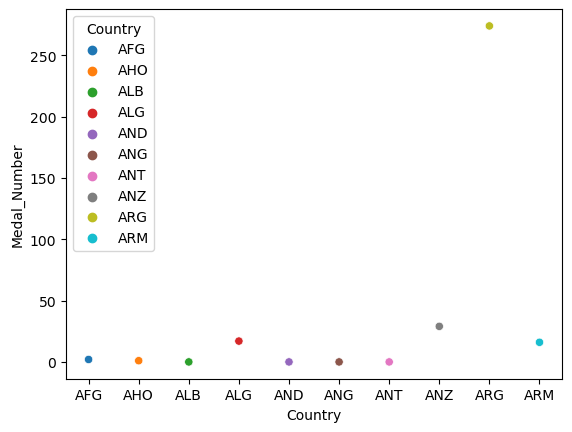

In [7]:
import seaborn as sns
sns.scatterplot(x='Country',y='Medal_Number',data=country_sort.head(10),hue='Country')

    Country  Medal_Number
216     USA        5637.0
214     URS        2503.0
79      GER        2165.0
74      GBR        2068.0
69      FRA        1777.0
100     ITA        1637.0
193     SWE        1536.0
36      CAN        1352.0
12      AUS        1320.0
171     RUS        1165.0


<AxesSubplot:xlabel='Country', ylabel='Medal_Number'>

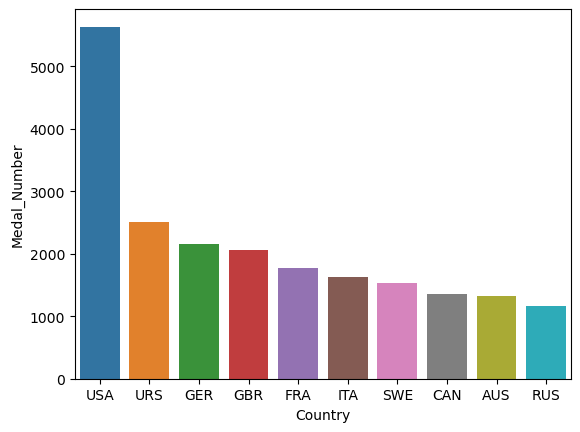

In [8]:
top_20=country_sort.sort_values(by=['Medal_Number','Country'],ascending=False).head(10)
print(top_20)

sns.barplot(x = 'Country',
            y = 'Medal_Number',
            data = top_20)
 



                        Sport   Age
41        Rhythmic Gymnastics  18.0
54                   Swimming  20.0
55      Synchronized Swimming  22.0
23             Figure Skating  22.0
20                     Diving  22.0
27                 Gymnastics  22.0
1               Alpine Skiing  23.0
24                   Football  23.0
50                Ski Jumping  23.0
48  Short Track Speed Skating  23.0
13                     Boxing  23.0
44                      Rugby  24.0
19                    Cycling  24.0
35        Military Ski Patrol  24.0
38            Nordic Combined  24.0


<AxesSubplot:xlabel='Sport', ylabel='Age'>

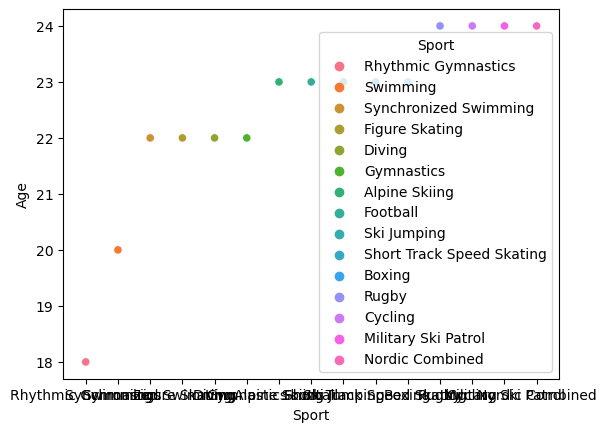

In [13]:
sport_age=df.groupby('Sport')['Age'].median()


sport_sort = pd.DataFrame(sport_age).reset_index()
sport_sort.columns = ['Sport', 'Age']
sport_sort=sport_sort.sort_values(by='Age',ascending=True).head(15)
print(sport_sort)
sns.scatterplot(x='Sport',y='Age',data=sport_sort,hue='Sport')

In [21]:
df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,medal_stats
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0,0.0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0,0.0
2,3,Gunnar Nielsen Aaby,M,24.0,0.0,0.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0,0.0
3,4,Edgar Lindenau Aabye,M,34.0,0.0,0.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1.0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0,0.0


In [25]:
country_watch=df.groupby(['NOC','Year','medal_stats'])['medal_stats'].sum()
print(country_watch)

NOC  Year  medal_stats
AFG  1936  0              0
     1948  0              0
     1956  0              0
     1960  0              0
     1964  0              0
                         ..
ZIM  2008  0              0
           1              4
     2012  0              0
     2014  0              0
     2016  0              0
Name: medal_stats, Length: 4736, dtype: int64


<AxesSubplot:xlabel='Year', ylabel='medal_stats'>

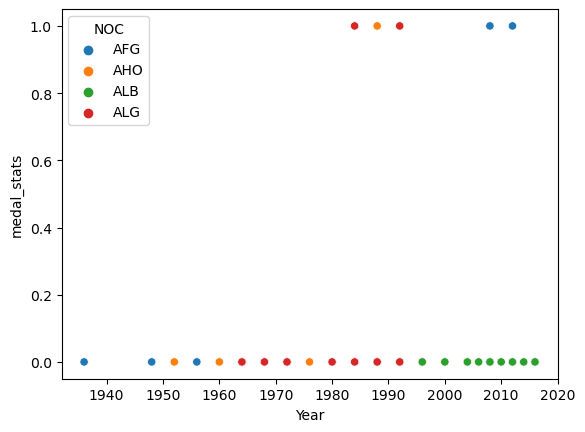

In [27]:
sns.scatterplot(x='Year',y='medal_stats',data=country_watch.head(50),hue='NOC')

In [22]:
df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,medal_stats
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0,0.0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0,0.0
2,3,Gunnar Nielsen Aaby,M,24.0,0.0,0.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0,0.0
3,4,Edgar Lindenau Aabye,M,34.0,0.0,0.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1.0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0,0.0


In [27]:
##create column bmi
df['BMI'] = df['Weight']/((df['Height']/100)*(df['Height']/100))
df=df.fillna(0)
df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,medal_stats,BMI
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0,0.0,24.691358
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0,0.0,20.761246
2,3,Gunnar Nielsen Aaby,M,24.0,0.0,0.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0,0.0,0.000000
3,4,Edgar Lindenau Aabye,M,34.0,0.0,0.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1.0,0.000000
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0,0.0,23.959094


In [35]:
from numpy import isinf

# Assuming you have a DataFrame 'df' with columns: 'age', 'weight', 'bmi', and 'medal_stat'

# Drop rows with infinity or extremely large values
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
X = df[['Age', 'Weight','Height', 'BMI']]
y = df['medal_stats']
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# 1. Decision Trees
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred, average='weighted')
dt_recall = recall_score(y_test, dt_pred, average='weighted')
dt_cm = confusion_matrix(y_test, dt_pred)

# 2. Random Forests
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='weighted')
rf_recall = recall_score(y_test, rf_pred, average='weighted')
rf_cm = confusion_matrix(y_test, rf_pred)

# 3. Support Vector Machines
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred, average='weighted')
svm_recall = recall_score(y_test, svm_pred, average='weighted')
svm_cm = confusion_matrix(y_test, svm_pred)

# 4. K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred, average='weighted')
knn_recall = recall_score(y_test, knn_pred, average='weighted')
knn_cm = confusion_matrix(y_test, knn_pred)

# 5. Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred, average='weighted')
lr_recall = recall_score(y_test, lr_pred, average='weighted')
lr_cm = confusion_matrix(y_test, lr_pred)

# Print evaluation metrics and confusion matrix for each model
print("Decision Trees:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("Confusion Matrix:")
print(dt_cm)

print("Random Forrests:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("Confusion Matrix:")
print(rf_cm)





/Users/zayesosa/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zayesosa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Decision Trees:
Accuracy: 0.8408964520075631
Precision: 0.7697710179687363
Recall: 0.8408964520075631
Confusion Matrix:
[[44984  1097]
 [ 7486   379]]
Random Forrests:
Accuracy: 0.8414896377859341
Precision: 0.7720684300615591
Recall: 0.8414896377859341
Confusion Matrix:
[[44992  1089]
 [ 7462   403]]


/Users/zayesosa/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
print("K-Nearest Neighbors")
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("Confusion Matrix:")
print(knn_cm)

print("Logistic Regression:")
print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("Confusion Matrix:")
print(lr_cm)

K-Nearest Neighbors
Accuracy: 0.8365031698365032
Precision: 0.7636819139312734
Recall: 0.8365031698365032
Confusion Matrix:
[[44753  1328]
 [ 7492   373]]
Logistic Regression:
Accuracy: 0.8542060579097616
Precision: 0.729667989369735
Recall: 0.8542060579097616
Confusion Matrix:
[[46081     0]
 [ 7865     0]]
